### Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Importing the training data:

In [2]:
train_data = pd.read_csv("SalaryData_Train(1).csv") 
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Importing the testing data:

In [3]:
test_data = pd.read_csv("SalaryData_Test(1).csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Adding both the train and test data to see the entire data:
##### This wont be used in the building of the model

In [4]:
data = pd.concat([train_data, test_data])
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### EDA and Preproccesing the data:

In [5]:
# Categorial data
cat_data = data.select_dtypes(exclude='number')
cat_data

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [6]:
# Numerical data
num_data = data.select_dtypes(include='number')
num_data

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


In [7]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0
capitalloss,45221.0,88.548617,404.838249,0.0,0.0,0.0,0.0,4356.0
hoursperweek,45221.0,40.938038,12.007640,1.0,40.0,40.0,45.0,99.0


In [8]:
# Checking how many values are there in categorical data
for col in cat_data:
    print(col, "\n")
    print(cat_data[col].value_counts())
    print("_____________","\n\n")

workclass 

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
_____________ 


education 

 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
_____________ 


maritalstatus 

 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
_____________ 


occupation 

 Craft-repair        

In [10]:
# One-Hot encoding the required columns:
cat_columns = list(cat_data.columns)
cat_columns.remove("sex")
cat_columns.remove("Salary")
cat_columns.remove("education")
train_data = pd.get_dummies(train_data, columns=cat_columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=cat_columns, drop_first=True)

In [11]:
# removing the education column, as the information is retained in the educationno column:
train_data = train_data.drop(labels="education", axis=1)
test_data = test_data.drop(labels="education", axis=1)
train_data

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,Male,2174,0,40,<=50K,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,Male,0,0,13,<=50K,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,Male,0,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,Male,0,0,40,<=50K,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,Female,0,0,40,<=50K,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,Female,0,0,38,<=50K,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30157,40,9,Male,0,0,40,>50K,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30158,58,9,Female,0,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30159,22,9,Male,0,0,20,<=50K,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
# Label encoding the required columns:
label_encoder = preprocessing.LabelEncoder()
train_data["Salary"]= label_encoder.fit_transform(train_data["Salary"])
test_data["Salary"]= label_encoder.fit_transform(test_data["Salary"])
train_data["sex"]= label_encoder.fit_transform(train_data["sex"])
test_data["sex"]= label_encoder.fit_transform(test_data["sex"])

In [13]:
# Checking if all the information is in numerics
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 80 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30161 non-null  int64
 1   educationno                           30161 non-null  int64
 2   sex                                   30161 non-null  int64
 3   capitalgain                           30161 non-null  int64
 4   capitalloss                           30161 non-null  int64
 5   hoursperweek                          30161 non-null  int64
 6   Salary                                30161 non-null  int64
 7   workclass_ Local-gov                  30161 non-null  uint8
 8   workclass_ Private                    30161 non-null  uint8
 9   workclass_ Self-emp-inc               30161 non-null  uint8
 10  workclass_ Self-emp-not-inc           30161 non-null  uint8
 11  workclass_ State-gov                  301

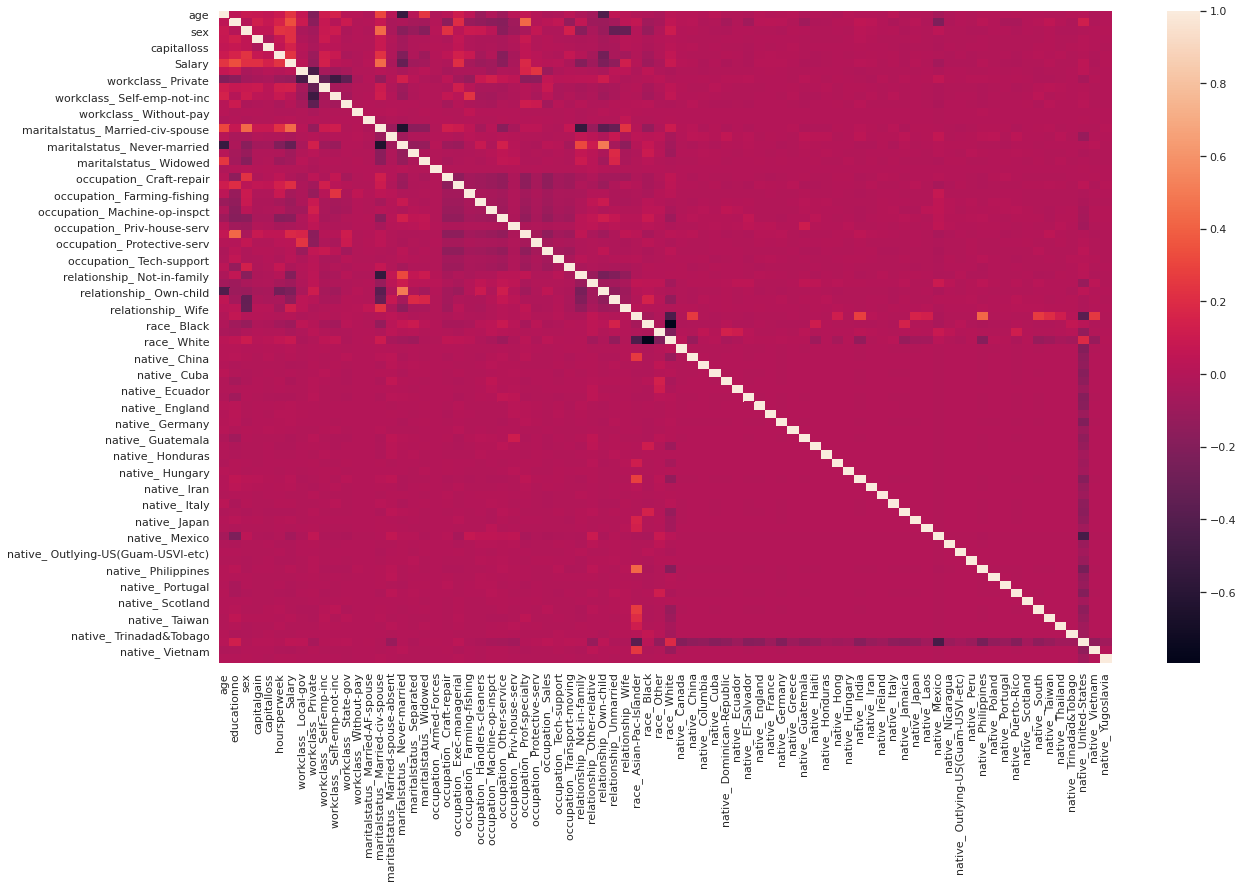

In [14]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(train_data.corr())

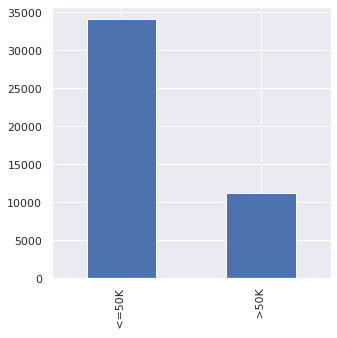

In [43]:
# Checking if the data is balanced:
plt.rcParams["figure.figsize"] = (5,5)
data["Salary"].value_counts().plot.bar()

##### Observation: we can see that the data is imbalanced as there are more observations of salary less than 50K

In [17]:
# diciding the data to x and y:
x_train_df = train_data.loc[:, train_data.columns != "Salary"]
y_train_df = train_data.loc[:, train_data.columns == "Salary"]
x_test_df = test_data.loc[:, test_data.columns != "Salary"]
y_test_df = test_data.loc[:, test_data.columns == "Salary"]

In [18]:
x_train = x_train_df.values
y_train = y_train_df.values.flatten()
x_test= x_test_df.values
y_test = y_test_df.values.flatten()

In [20]:
# Standardizing the data:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Using PCA to reduce the dimensions:

In [21]:
pca = PCA(n_components = 80)
pca_values = pca.fit_transform(train_data) 
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.7, 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ])

###### We can see that the first 2 columns of PCA values have retained the whole 100% information. So we will use the first 2 column in our model

In [22]:
x_train_df = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2'])], axis = 1)
x_train_df

,pc1,pc2
0,1082.110002,-86.393704
1,-1091.888510,-90.247064
2,-1091.886889,-90.229833
3,-1091.884837,-90.200091
4,-1091.888132,-90.248119
...,...,...
30156,-1091.888579,-90.253953
30157,-1091.886585,-90.225445
30158,-1091.884049,-90.188935
30159,-1091.891769,-90.295393


In [23]:
pca_values_test = pca.fit_transform(test_data) 
var2 = pca.explained_variance_ratio_
var3 = np.cumsum(np.round(var,decimals = 4)*100)
x_test_df = pd.concat([pd.DataFrame(pca_values_test[:,0:2],columns=['pc1','pc2'])], axis = 1)
x_test_df

,pc1,pc2
0,-1120.152031,-90.960547
1,-1120.148736,-90.915300
2,-1120.151375,-90.951318
3,6567.839639,-77.964009
4,-1120.152259,-90.961205
...,...,...
15055,-1120.150668,-90.941152
15056,-1120.150412,-90.936390
15057,-1120.148557,-90.912983
15058,4334.842972,-81.725878


In [24]:
x_train = x_train_df.values
x_test= x_test_df.values
y_test.shape

(15060,)

### Building the model:

In [26]:
# Getting 5 random values for gamma and c
def random_parameters():
    from random import uniform
    gamma = []
    c = []
    for i in range(5):
        gamma.append((round(uniform(0,50),3)))
        c.append((round(uniform(0,15),3)))
    return gamma , c

#### Hyperparameter tuning:

##### (this will take up a lot of resources on the machine)

In [27]:
# This line will take some time to run
gamma, c = random_parameters()
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':gamma,'C':c }]
gsv = GridSearchCV(clf,param_grid,cv=2)
gsv.fit(x_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [14.351, 6.342, 14.843, 9.824, 0.712],
                          'gamma': [1.382, 46.367, 28.08, 29.171, 11.236],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# Best parameters
gsv.best_params_ , gsv.best_score_ 

({'C': 14.351, 'gamma': 46.367, 'kernel': 'rbf'}, 0.8253373647906961)

In [30]:
clf = SVC(C= gsv.best_params_['C'], gamma = gsv.best_params_["gamma"], kernel="rbf")
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {round(acc,2)}%")

Accuracy: 75.43%


In [31]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1
0,11360,0
1,3700,0
